In [3]:
%autosave 300
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%config Completer.use_jedi = False

Autosaving every 300 seconds


In [4]:
import os

os.chdir(
    "/mnt/batch/tasks/shared/LS_root/mounts/clusters/copilot-model-run/code/Users/Soutrik.Chowdhury/unstructured_data_experiments"
)
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/copilot-model-run/code/Users/Soutrik.Chowdhury/unstructured_data_experiments


In [5]:
from pdf2image import convert_from_path
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import AzureChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
)
from dotenv import load_dotenv, find_dotenv
import base64
import requests
import json
from datetime import datetime
from langchain.schema import Document
import re
import shutil
from joblib import Parallel, delayed
from functools import partial
import pickle
from IPython.display import Image, display
from langchain_core.runnables import RunnableLambda
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser, StrOutputParser
import asyncio
import nest_asyncio
from glob import glob

In [6]:
load_dotenv(find_dotenv("dev.env"))

True

In [7]:
import pdfplumber
import tabula
import pymupdf

In [8]:
# pdfFileObj = open("data/1. MSA Gateware (Enteron) 1.pdf", 'rb') 
# pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
# pageObj = pdfReader.getPage(0) 

In [52]:
dfs = tabula.read_pdf(
    "data/1. MSA Gateware (Enteron) 1.pdf", pages="17", multiple_tables=False
)

Aug 26, 2024 9:09:41 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Aug 26, 2024 9:09:41 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>


In [53]:
len(dfs)

1

In [54]:
dfs[0]

,DocuSign Envelope ID: 3BDE136F-BA28-419D-A682-AAAD1BA87428
0,of goods or services to AB InBev or the releva...
1,with a copy of AB InBev's Anti-Bribery Policy ...
2,providing goods or services pursuant to or in ...
3,its Associated Parties and sub-contractors wil...
4,5.5AB InBev is committed to observing applicab...
...,...
64,"nd b collectively, “Sanctions”)"
65,"(ii) that is, or is part of, a government of ..."
66,ountrywide sanctions imposed by a Sanctions au...
67,"egion, Cuba, Iran, North Korea, Sudan, and Syr..."


In [55]:
doc = pymupdf.open("data/1. MSA Gateware (Enteron) 1.pdf")

In [56]:
page = doc[16]

In [14]:
# dir(page)

In [15]:
page.get_image_info()

[{'number': 0,
  'bbox': (104.46800231933594,
   236.06802368164062,
   490.8900146484375,
   622.489990234375),
  'transform': (373.2699890136719,
   -373.2699890136719,
   13.152000427246094,
   13.152000427246094,
   104.46800231933594,
   609.3380126953125),
  'width': 1466,
  'height': 51,
  'colorspace': 3,
  'cs-name': 'DeviceRGB',
  'xres': 96,
  'yres': 96,
  'bpc': 8,
  'size': 1081}]

In [16]:
page.get_images()

[(286, 381, 1466, 51, 8, 'DeviceRGB', '', 'Image26', 'FlateDecode')]

In [57]:
page.find_tables().tables

In [58]:
tabs = page.find_tables().tables

In [59]:
tb = tabs[0]

In [20]:
# dir(tb)

In [60]:
print(tb.to_markdown())

|Col1|of goods or services to AB InBev or the relevant AB InBev Affiliates under this Agreement (&quot;sub&amp;#45;contractors&quot;) are provided|Col3|Col4|Col5|Col6|Col7|
|---|---|---|---|---|---|---|
||with a copy of AB InBev&#x27;s Anti&amp;#45;Bribery Policy for Suppliers (&quot;Code&quot;) and AB InBev’s Responsible Sourcing Policy. When||||||
||providing goods or services pursuant to or in connection with this Agreement, the Service Provider will, and will ensure that||||||
||its Associated Parties and sub&amp;#45;contractors will, comply with the principles set out in the Code.||||||
|25.5 AB InBev is committed to observing applicable anti&amp;#45;corruption laws of the countries in which AB InBev and its affiliates|||||||
||operate, including the United States Foreign Corrupt Practices Act (“FCPA”), UK Bribery Act, and other applicable laws||||||
||dealing with bribery, corrupt practices, or money&amp;#45;laundering (“Anti&amp;#45;Corruption Laws”). AB InBev requires its Servi

In [22]:
tb.bbox

(72.02400207519531, 75.239990234375, 523.2589233398437, 385.6099853515625)

In [23]:
tb.to_pandas()

,Col0,"of goods or services to AB InBev or the relevant AB InBev Affiliates under this Agreement (""sub-contractors"") are provided",Col2,Col3,Col4,Col5,Col6
0,None,with a copy of AB InBev's Anti-Bribery Policy ...,None,None,None,None,None
1,None,providing goods or services pursuant to or in ...,None,None,None,None,None
2,None,its Associated Parties and sub-contractors wil...,None,None,None,None,
3,25.5 AB InBev is committed to observing applic...,None,None,None,None,None,None
4,,"operate, including the United States Foreign C...",None,None,None,None,None
5,None,"dealing with bribery, corrupt practices, or mo...",None,None,None,None,None
6,None,"Providers, and its Associated Parties, to comp...",None,None,None,None,None
7,None,of AB InBev or in connection with an agreement...,None,None,None,None,None
8,None,importance to AB InBev of compliance with thes...,None,None,None,None,None
9,25.6 The Service Provider accordingly represen...,None,None,None,None,None,None


In [24]:
page.get_contents()

[211, 212, 213]

In [25]:
print(page.get_text())

 
 
 
 
of goods or services to AB InBev or the relevant AB InBev Affiliates under this Agreement ("sub-contractors") are provided 
with a copy of AB InBev's Anti-Bribery Policy for Suppliers ("Code") and AB InBev’s Responsible Sourcing Policy. When 
providing goods or services pursuant to or in connection with this Agreement, the Service Provider will, and will ensure that 
its Associated Parties and sub-contractors will, comply with the principles set out in the Code. 
25.5 AB InBev is committed to observing applicable anti-corruption laws of the countries in which AB InBev and its affiliates 
operate, including the United States Foreign Corrupt Practices Act (“FCPA”), UK Bribery Act, and other applicable laws 
dealing with bribery, corrupt practices, or money-laundering (“Anti-Corruption Laws”). AB InBev requires its Service 
Providers, and its Associated Parties, to comply with AB InBev’s ethical standards when dealing with third parties on behalf 
of AB InBev or in connection with

In [61]:
import pdfplumber

In [97]:
pdf = pdfplumber.open("data/1. MSA Gateware (Enteron) 1.pdf")

In [98]:
dir(pdf)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annots',
 'cached_properties',
 'chars',
 'close',
 'curve_edges',
 'curves',
 'doc',
 'edges',
 'flush_cache',
 'horizontal_edges',
 'hyperlinks',
 'images',
 'laparams',
 'lines',
 'metadata',
 'objects',
 'open',
 'pages',
 'pages_to_parse',
 'password',
 'path',
 'rect_edges',
 'rects',
 'rsrcmgr',
 'stream',
 'stream_is_external',
 'structure_tree',
 'textboxhorizontals',
 'textboxverticals',
 'textlinehorizontals',
 'textlineverticals',
 'to_csv',
 'to_dict',
 'to_json',
 'unicode_norm',
 'vertical_edges']

In [99]:
len(pdf.chars)

113417

In [100]:
len(pdf.images)

47

In [101]:
len(pdf.rects)

4101

In [102]:
len(pdf.pages)

32

In [103]:
p1 = pdf.pages[17]

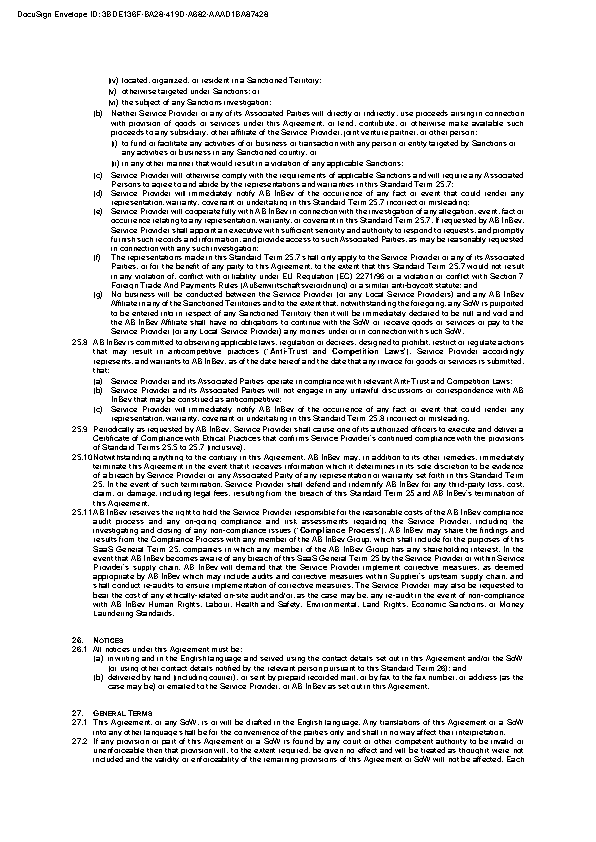

In [104]:
im = p1.to_image()
im

In [35]:
# dir(p1)

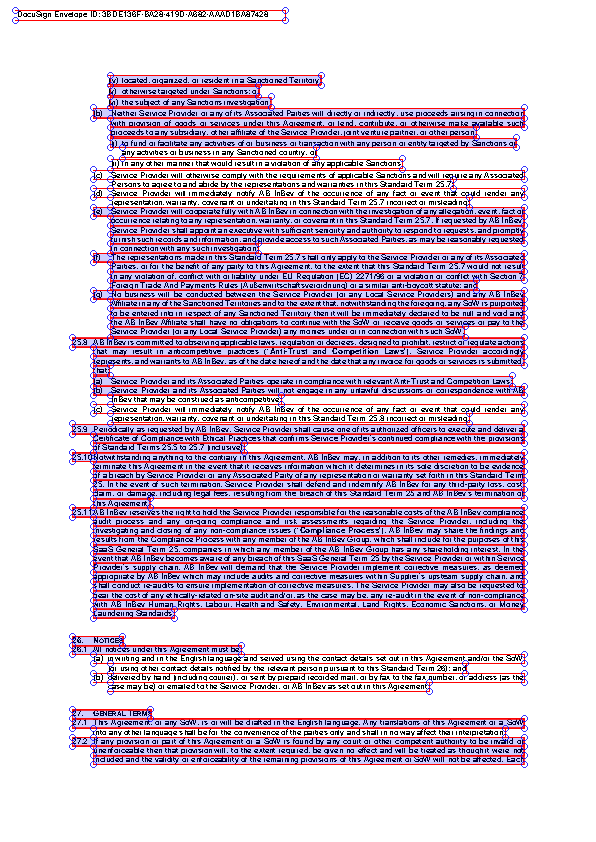

In [65]:
im.reset().debug_tablefinder()

In [37]:
# p1.debug_tablefinder()

In [66]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "lines",
    "snap_y_tolerance": 15,
    "snap_x_tolerance": 10,
}

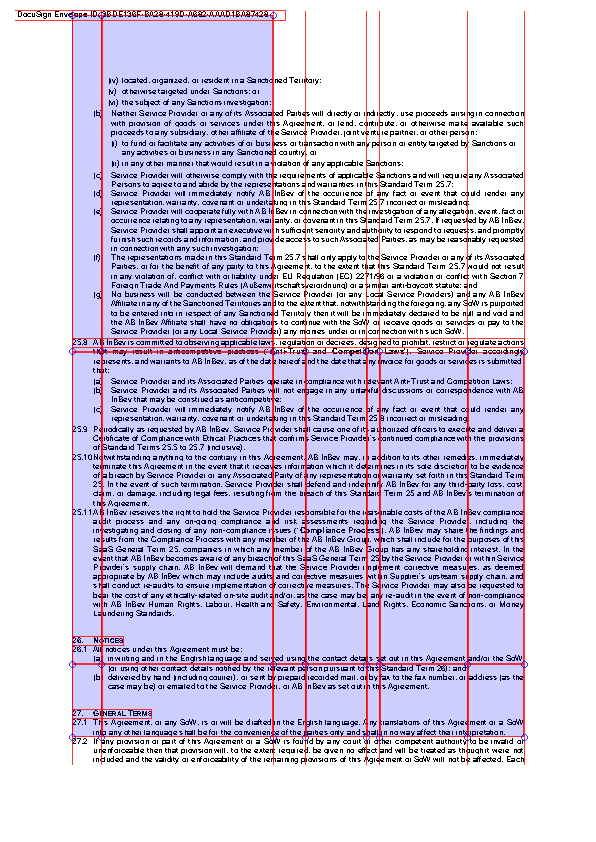

In [67]:
im.reset().debug_tablefinder(table_settings)

In [68]:
table = p1.extract_table(table_settings)
print(table)

[['lope ID:\n(b)\n(c)\n(d)\n(e)\n(f)\n(g)\n25.8 AB', '3BDE136F-BA28-419D-A682-AAAD1BA87428\n(iv) located, organized, or resident in a Sanctio\n(v) otherwise targeted under Sanctions; or\n(vi) the subject of any Sanctions investigation;\nNeither Service Provider or any of its Associa\nwith provision of goods or services under th\nproceeds to any subsidiary, other affiliate of th\n(i) to fund or facilitate any activities of or busin\nany activities or business in any Sanctione\n(ii) in any other manner that would result in a\nService Provider will otherwise comply with th\nPersons to agree to and abide by the represe\nService Provider will immediately notify AB\nrepresentation, warranty, covenant or underta\nService Provider will cooperate fully with AB In\noccurrence relating to any representation, war\nService Provider shall appoint an executive wi\nfurnish such records and information, and prov\nin connection with any such investigation;\nThe representations made in this Standard Te\n

In [105]:
print(p1.extract_text())

DocuSign Envelope ID: 3BDE136F-BA28-419D-A682-AAAD1BA87428
(iv) located, organized, or resident in a Sanctioned Territory;
(v) otherwise targeted under Sanctions; or
(vi) the subject of any Sanctions investigation;
(b) Neither Service Provider or any of its Associated Parties will directly or indirectly, use proceeds arising in connection
with provision of goods or services under this Agreement, or lend, contribute, or otherwise make available such
proceeds to any subsidiary, other affiliate of the Service Provider, joint venture partner, or other person:
(i) to fund or facilitate any activities of or business or transaction with any person or entity targeted by Sanctions or
any activities or business in any Sanctioned country, or
(ii) in any other manner that would result in a violation of any applicable Sanctions;
(c) Service Provider will otherwise comply with the requirements of applicable Sanctions and will require any Associated
Persons to agree to and abide by the representation

##### supplier

In [73]:
pdf = pdfplumber.open("data/20240729_Crown_Holdings_Inc-_10_Q_FY24 Q2.pdf")

In [87]:
p1 = pdf.pages[18]

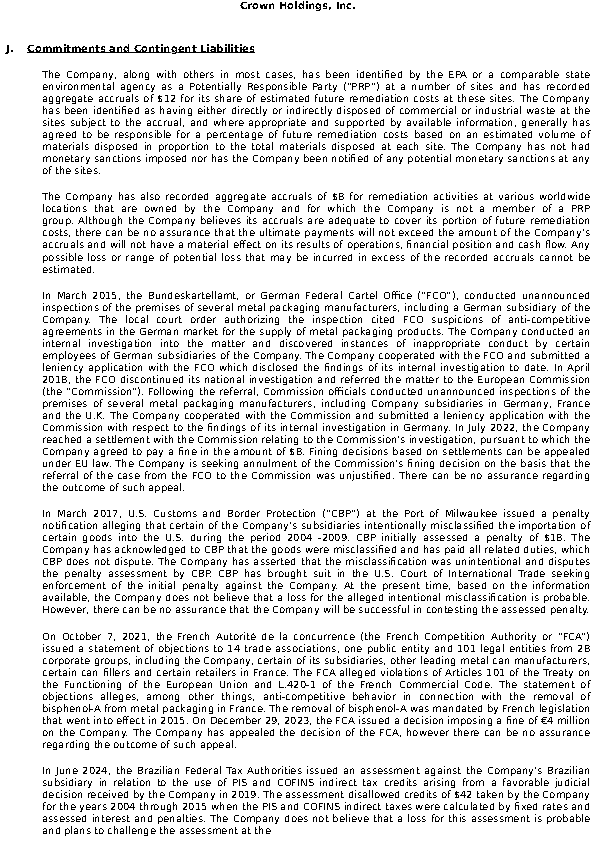

In [88]:
im = p1.to_image()
im

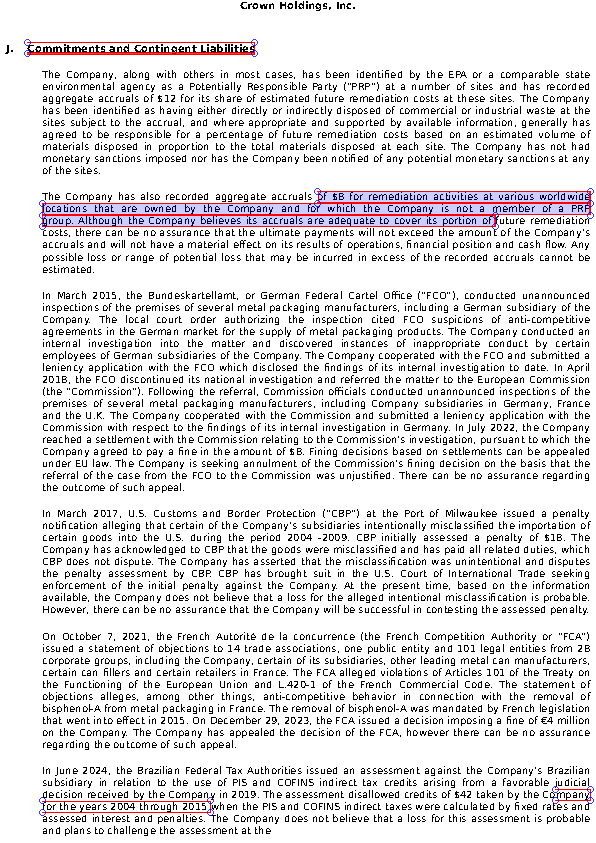

In [89]:
im.reset().debug_tablefinder()

In [91]:
# im.reset().debug_tablefinder(table_settings)

In [93]:
table = p1.extract_table()
# print(table)

[[None, 'of $8 for remediation activities at various worldwide'], ['locations that are owned by the Company and for which the Company is not a member of a PRP', None], ['group. Although the Company believes its accruals are adequate to cover its portion of', None]]


In [94]:
table

[[None, 'of $8 for remediation activities at various worldwide'],
 ['locations that are owned by the Company and for which the Company is not a member of a PRP',
  None],
 ['group. Although the Company believes its accruals are adequate to cover its portion of',
  None]]

In [96]:
print(p1.extract_text())

Crown Holdings, Inc.
J. Commitments and Contingent Liabilities
The Company, along with others in most cases, has been identified by the EPA or a comparable state
environmental agency as a Potentially Responsible Party (“PRP”) at a number of sites and has recorded
aggregate accruals of $12 for its share of estimated future remediation costs at these sites. The Company
has been identified as having either directly or indirectly disposed of commercial or industrial waste at the
sites subject to the accrual, and where appropriate and supported by available information, generally has
agreed to be responsible for a percentage of future remediation costs based on an estimated volume of
materials disposed in proportion to the total materials disposed at each site. The Company has not had
monetary sanctions imposed nor has the Company been notified of any potential monetary sanctions at any
of the sites.
The Company has also recorded aggregate accruals of $8 for remediation activities at variou